## Income Qualification:

kaggle link for data:

https://www.kaggle.com/c/costa-rican-household-poverty-prediction

### Problem Statement:
Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

### A start
- Import the data
- Exploratory Data Analysis
- Inspect 'object' type features
- Inspect Null
- Inspect Dependent Variable
- Check for Bias
- drop data to get unbiased data

### Visualizations
- pending

### Model : Random Forest:
- A type of ensemble ML Classification algo
- RF is a meta estimator that fits a number of decision tree classifiers on various sub-samples of datasets
- Uses averaging to improve on the prediction accuracy and control for overfitting 

#### Steps: 
- Step 1 : define train and test set
- Step 2 : fit a vanilla Random Forest Classifier
- Step 3 : get feature importances
- Step 4 : get y_pred
- Step 5 : get performance measures : confusion_matrix, accuracy_score, roc_curve {predict_proba for class == 1} classification_report, log_loss, 

### Tunning for: 
- n_estimators - (pending)
- max depth - (pending) 
- Min sample split - (pending)
- max features - (pending)

### GridSearchCV:
- fit model
- get preds
- classification_report
- confusion_matrix
- best_params_
- best_score_
- gs.best_estimator_
- cv_results_


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Exploratory Data Analysis: 

In [3]:
print(df_train.shape, df_test.shape)

(9557, 143) (23856, 142)


In [4]:
df_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [5]:
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [6]:
print(df_train.info())
print(df_train.dtypes.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None
[dtype('O') dtype('float64') dtype('int64')]


### Inspect 'object' type features

In [7]:
df_train.columns[df_train.dtypes==object]

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

- Id : identifier
- idhogar : Household level identifier
- dependency : Dependency rate  ---> SQBdependency
- edjefe : years of education of male head of household ---> SQBedjefe
- edjefa : years of education of female head of household

In [8]:
print('dependency:\n',df_train['dependency'].unique())
print('edjefe:\n',df_train['edjefe'].unique())
print('edjefa:\n',df_train['edjefa'].unique())

dependency:
 ['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
edjefe:
 ['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
edjefa:
 ['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [9]:
df_train[['dependency','SQBdependency']][df_train['dependency']=='yes']

,dependency,SQBdependency
3,yes,1.0
4,yes,1.0
5,yes,1.0
6,yes,1.0
7,yes,1.0
...,...,...
9525,yes,1.0
9526,yes,1.0
9527,yes,1.0
9550,yes,1.0


- SQBdependency is square of dependency
- dependency is 'no' SQBdependency is '0'
- dependency is 'yes' SQBdependency is '1'
- can convert dependency to int!

In [10]:
df_train['dependency'] = np.sqrt(df_train['SQBdependency'])
df_train['dependency'].unique()

array([0.        , 8.        , 1.        , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333335, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.20000001, 2.5       ,
       1.20000004, 4.        , 1.33333338, 2.25      , 0.22222222,
       5.        , 0.83333332, 0.80000003, 6.        , 3.5       ,
       1.66666664, 0.2857143 , 1.75      , 0.71428571, 0.16666667,
       0.60000001])

In [11]:
df_train[['edjefe','edjefa','SQBedjefe']][:10]

,edjefe,edjefa,SQBedjefe
0,10,no,100
1,12,no,144
2,no,11,0
3,11,no,121
4,11,no,121
5,11,no,121
6,11,no,121
7,9,no,81
8,9,no,81
9,9,no,81


In [12]:
df_train[['edjefe','edjefa','SQBedjefe', 'parentesco1']][df_train['edjefe']=='yes']
#df_train[['edjefe','edjefa','SQBedjefe']][df_train['edjefe']=='yes']

,edjefe,edjefa,SQBedjefe,parentesco1
601,yes,no,1,1
602,yes,no,1,0
2392,yes,no,1,0
2393,yes,no,1,0
2394,yes,no,1,1
...,...,...,...,...
9416,yes,no,1,0
9417,yes,no,1,1
9463,yes,no,1,1
9464,yes,no,1,0


In [13]:
# when head of household is educated
#df_train[(df_train['parentesco1']==0) & (df_train['edjefe']=='yes')][['edjefe','edjefa','parentesco1']]

# when head of household has no education
#df_train[(df_train['edjefe']=='no') & (df_train['edjefa']=='no')][['edjefe','edjefa','parentesco1']]

# when male head is educated
#df_train[(df_train['edjefe']=='yes') & (df_train['edjefa']=='no')][['edjefe','edjefa','parentesco1']]

# when female head is educated
df_train[(df_train['edjefe']=='no') & (df_train['edjefa']=='yes')][['edjefe','edjefa','parentesco1']]


,edjefe,edjefa,parentesco1
432,no,yes,1
566,no,yes,0
567,no,yes,0
568,no,yes,1
569,no,yes,0
...,...,...,...
8167,no,yes,0
8436,no,yes,0
8437,no,yes,1
8509,no,yes,1


In [14]:
condit = [(df_train['edjefe']=='no') & (df_train['edjefa']=='no'),    # not educated
          (df_train['edjefe']=='yes') & (df_train['edjefa']=='no'),   # male head educated
          (df_train['edjefe']=='no') & (df_train['edjefa']=='yes'),   # female head educated
          (df_train['edjefe']!='no') & (df_train['edjefe']!='yes') & (df_train['edjefa']=='no'), # male head educated years
          (df_train['edjefe']=='no') & (df_train['edjefa']!='no')]  # female head educated years

choice = [0,1,1,df_train['edjefe'],df_train['edjefa']]

df_train['edjefJoin'] = np.select(condit, choice)
df_train[['edjefe', 'edjefa', 'edjefJoin']][:15]

,edjefe,edjefa,edjefJoin
0,10,no,10
1,12,no,12
2,no,11,11
3,11,no,11
4,11,no,11
5,11,no,11
6,11,no,11
7,9,no,9
8,9,no,9
9,9,no,9


### Inspect Null

In [15]:
df_train.isnull().sum().to_frame().sort_values(0,ascending = False)[:10]

,0
rez_esc,7928
v18q1,7342
v2a1,6860
meaneduc,5
SQBmeaned,5
instlevel2,0
hogar_adul,0
parentesco10,0
parentesco11,0
parentesco12,0


- rez_esc       7928:  Years behind in school
- v18q1	        7342 :   number of tablets household owns
- v2a1	        6860 :   Monthly rent payment
- SQBmeaned	       5 :  meaned squared
- meaneduc	       5 :  average years of education for adults (18+)

In [16]:
df_train[df_train['meaneduc'].isnull()][['Id','idhogar','meaneduc','hogar_total','edjefe','edjefa', 'age', 'escolari']]

,Id,idhogar,meaneduc,hogar_total,edjefe,edjefa,age,escolari
1291,ID_bd8e11b0f,1b31fd159,NaN,1,no,10,18,10
1840,ID_46ff87316,a874b7ce7,NaN,2,4,no,18,6
1841,ID_69f50bf3e,a874b7ce7,NaN,2,4,no,18,4
2049,ID_db3168f9f,faaebf71a,NaN,2,12,no,19,12
2050,ID_2a7615902,faaebf71a,NaN,2,12,no,19,12


3 households with NAN mean education all have only teens living there

In [17]:
temp = df_train[df_train['meaneduc'].isnull()][['Id','idhogar','escolari']].groupby('idhogar').mean().reset_index()
temp

,idhogar,escolari
0,1b31fd159,10
1,a874b7ce7,5
2,faaebf71a,12


In [18]:
for row in temp.iterrows():
    print (row[1])

idhogar     1b31fd159
escolari           10
Name: 0, dtype: object
idhogar     a874b7ce7
escolari            5
Name: 1, dtype: object
idhogar     faaebf71a
escolari           12
Name: 2, dtype: object


In [19]:
for row in temp.iterrows():
    idx = row[0]
    idhogar = row[1]['idhogar']
    t = temp[temp['idhogar']==idhogar]['escolari'].tolist()[0]
    df_train.at[idx,'meaneduc'] = t
    df_train.at[idx,'SQBmeaned'] = t*t

In [20]:
df_train['meaneduc'] = df_train['meaneduc'].fillna(0)
df_train['SQBmeaned'] = df_train['SQBmeaned'].fillna(0)

v2a1 null 

In [21]:
norent = df_train[df_train['v2a1'].isnull()]
norent

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefJoin
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,8464,1,0,0,0.250000,64.0000,144.0000,8464,4,11
13,ID_064b57869,NaN,0,4,0,1,1,1,1.0,0,...,6241,4,0,0,1.000000,1.0000,90.2500,6241,4,4
14,ID_5c837d8a4,NaN,0,4,0,1,1,1,1.0,0,...,1521,4,0,0,1.000000,1.0000,90.2500,1521,4,4
26,ID_e5cdba865,NaN,0,5,0,1,1,0,NaN,0,...,1936,1,225,0,0.250000,0.0000,225.0000,1936,4,15
32,ID_e24d9c3c9,NaN,0,5,0,1,1,0,NaN,0,...,784,25,121,1,2.777778,0.0625,27.5625,784,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,ID_fc386a944,NaN,0,3,0,0,0,0,NaN,2,...,100,25,4,9,6.250000,2.2500,16.0000,100,2,2
9543,ID_2f8268634,NaN,0,3,0,0,0,0,NaN,2,...,169,25,4,9,6.250000,2.2500,16.0000,169,2,2
9544,ID_4c180d79f,NaN,0,3,0,0,0,0,NaN,2,...,1089,25,4,9,6.250000,2.2500,16.0000,1089,2,2
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,3721,4,0,0,4.000000,1.0000,9.0000,3721,2,0


In [22]:
print(norent[norent['tipovivi1']==1]['Id'].count())   #own and fully paid house
print(norent[norent['tipovivi2']==1]['Id'].count())   #own and paying installments 
print(norent[norent['tipovivi3']==1]['Id'].count())   #rented
print(norent[norent['tipovivi4']==1]['Id'].count())   #precarious
print(norent[norent['tipovivi5']==1]['Id'].count())   #other
print(norent[norent['v2a1'].isnull()]['Id'].count())

5911
0
0
163
786
6860


In [23]:
df_train['v2a1'] = df_train['v2a1'].fillna(0)

v18q1 - number of tablets household owns
v18q  - owns a tablet

In [24]:
print(df_train['v18q1'].isnull().sum())   
print((df_train['v18q']==0).sum())

7342
7342


In [25]:
df_train['v18q1'] = df_train['v18q1'].fillna(0)
print(df_train['v18q1'].isnull().sum()) 

0


##### rez_esc 7928: Years behind in school

In [26]:
df_train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [27]:
rez_nan = df_train[df_train['rez_esc'].isnull()]
rez_nan

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefJoin
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0000,100.0000,1849,4,10
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0000,25.0000,4489,4,12
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0000,144.0000,8464,4,11
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0000,121.0000,1369,4,11
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,1444,16,121,4,1.777778,1.0000,121.0000,1444,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,2116,25,81,1,1.562500,0.0625,68.0625,2116,2,9
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,4,25,81,1,1.562500,0.0625,68.0625,4,2,9
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,2500,25,81,1,1.562500,0.0625,68.0625,2500,2,9
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,676,25,81,1,1.562500,0.0625,68.0625,676,2,9


In [28]:
rez_nan[['age']].describe()

,age
count,7928.000000
mean,38.833249
std,20.989486
min,0.000000
25%,24.000000
50%,38.000000
75%,54.000000
max,97.000000


In [29]:
df_train['rez_esc'] = df_train['rez_esc'].fillna(0)

In [30]:
df_train.isnull().sum().to_frame().sort_values(0,ascending = False)[:10]

,0
Id,0
v2a1,0
parentesco10,0
parentesco11,0
parentesco12,0
idhogar,0
hogar_nin,0
hogar_adul,0
hogar_mayor,0
hogar_total,0


### Inspect Dependent Variable

In [31]:
df_train['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

##### Can Poverty levels be different in the same house?

In [32]:
d = {}
difPov = []
for row in df_train.iterrows():
    idhogar = row[1]['idhogar']
    target = row[1]['Target']
    if idhogar in d:
        if d[idhogar]!=target:
            difPov.append(idhogar)
    else:
        d[idhogar]=target

len(set(difPov))

85

In [33]:
df_train[df_train['idhogar']==difPov[1]][['idhogar','parentesco1', 'Target']]

,idhogar,parentesco1,Target
282,4b6077882,1,1
283,4b6077882,0,2
284,4b6077882,0,2


In [34]:
df_train[df_train['idhogar']==difPov[2]][['idhogar','parentesco1', 'Target']]

,idhogar,parentesco1,Target
285,6833ac5dc,0,2
286,6833ac5dc,0,2
287,6833ac5dc,0,2
288,6833ac5dc,1,2
289,6833ac5dc,0,2
290,6833ac5dc,0,1


In [35]:
for i in set(difPov):
    head = df_train[df_train['idhogar']==i][['idhogar','parentesco1','Target']]
    target = head[head['parentesco1']==1]['Target'].tolist()[0]
    for row in head.iterrows():
        idx = row[0]
        if row[1]['parentesco1']!=1:
            df_train.at[idx,'Target']=target

In [36]:
head

,idhogar,parentesco1,Target
2311,0511912b6,1,4
2312,0511912b6,0,4
2313,0511912b6,0,4
2314,0511912b6,0,3


In [37]:
difPov[1]

'4b6077882'

#### Can there be a house without household head:
- 'idhogar' Household level identifier
- 'paterntsco1' =1 if household head

In [38]:
df_train['parentesco1'].dtypes

dtype('int64')

In [39]:
len(df_train['idhogar'].unique())

2988

In [40]:
temp = df_train.groupby('idhogar')['parentesco1'].sum()
temp = temp.loc[temp==0]
temp

idhogar
03c6bdf85    0
09b195e7a    0
1367ab31d    0
1bc617b23    0
374ca5a19    0
61c10e099    0
6b1b2405f    0
896fe6d3e    0
a0812ef17    0
ad687ad89    0
b1f4d89d7    0
bfd5067c2    0
c0c8a5013    0
d363d9183    0
f2bfa75c4    0
Name: parentesco1, dtype: int64

In [41]:
df_train[df_train['idhogar']=='4b6077882'][['idhogar','parentesco1','age','Target']]

,idhogar,parentesco1,age,Target
282,4b6077882,1,22,1
283,4b6077882,0,7,1
284,4b6077882,0,2,1


- get dataframe from ids in temp
- what is the impact of not having a head of family -- young ppls house??
- why are there house with only children?? significance??

In [42]:
d = temp.index.to_list()
for i in d: 
    print (i)

03c6bdf85
09b195e7a
1367ab31d
1bc617b23
374ca5a19
61c10e099
6b1b2405f
896fe6d3e
a0812ef17
ad687ad89
b1f4d89d7
bfd5067c2
c0c8a5013
d363d9183
f2bfa75c4


In [43]:
for i in d: 
    print(df_train[df_train['idhogar']==i][['idhogar','parentesco1','age','Target']])

        idhogar  parentesco1  age  Target
7705  03c6bdf85            0   11       3
7706  03c6bdf85            0    9       3
        idhogar  parentesco1  age  Target
4935  09b195e7a            0   34       3
        idhogar  parentesco1  age  Target
7086  1367ab31d            0   19       3
        idhogar  parentesco1  age  Target
9497  1bc617b23            0   12       3
        idhogar  parentesco1  age  Target
5396  374ca5a19            0   10       3
        idhogar  parentesco1  age  Target
5391  61c10e099            0   20       3
        idhogar  parentesco1  age  Target
7438  6b1b2405f            0   43       4
7439  6b1b2405f            0   14       4
7440  6b1b2405f            0   32       4
        idhogar  parentesco1  age  Target
4975  896fe6d3e            0   16       3
        idhogar  parentesco1  age  Target
8636  a0812ef17            0   17       3
        idhogar  parentesco1  age  Target
7756  ad687ad89            0   16       3
        idhogar  parentesco1  age 

9 of the households are children only, the other 6 have adults, but the Target Variable is the same for all. 

#### Check for bias

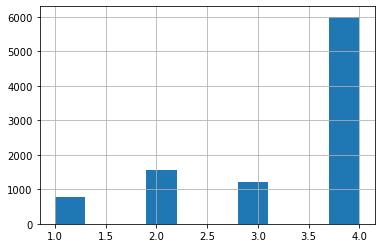

In [44]:
df_train['Target'].hist()

there seems to be a bias towards target == 4, dropping 75% of data where target == 4 should make the data unbiased

In [88]:
df_train_unbiased = df_train.drop(df_train.query('Target==4').sample(frac=.75).index)

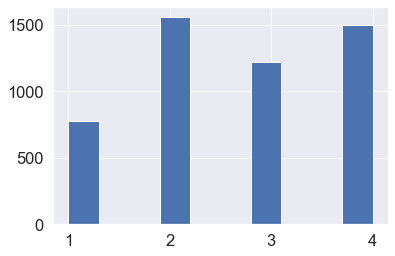

In [89]:
df_train_unbiased['Target'].hist()

## Model:

### Why  Random Forest:
- A type of ensemble ML Classification algo
- RF is a meta estimator that fits a number of decision tree classifiers on various sub-samples of datasets
- Uses averaging to improve on the prediction accuracy and control for overfitting 

### Steps: 
- Step 1 : define train and test set
- Step 2 : fit a vanilla Random Forest Classifier
- Step 3 : get feature importances
- Step 4 : get y_pred
- Step 5 : get performance measures : confusion_matrix, accuracy_score, roc_curve {predict_proba for class == 1} classification_report, log_loss, 

### Tunning for: 
- n_estimators
- max depth 
- Min sample split 
- max features

### GridSearchCV:
- fit model
- get preds
- classification_report
- confusion_matrix
- best_params_
- best_score_
- gs.best_estimator_
- cv_results_

In [47]:
X = df_train_unbiased.drop(['Id', 'idhogar', 'Target', 'edjefe', 'edjefa','edjefJoin'],axis=1)
y = df_train_unbiased['Target']

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4043, 138) (4043,)
(1011, 138) (1011,)


In [51]:
print(X_train.dtypes.unique())
#X_train.columns[X_train.dtypes==object]

[dtype('float64') dtype('int64')]


#### Model Predictions and Estimates: 

In [52]:
clf = RandomForestClassifier()

In [53]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
importances = list(clf.feature_importances_)
importances

[0.01568116765717988,
 0.0019772109308482124,
 0.022209376133166585,
 0.0013809238628352154,
 0.000536163883567691,
 0.0035710432985022844,
 0.008209529689478313,
 0.012313459482655175,
 0.01088408884773166,
 0.018538786655637508,
 0.016182668224180585,
 0.0125036620534823,
 0.013957078586689835,
 0.016462814418780832,
 0.013823537152006578,
 0.01678615522894437,
 0.011570107968564527,
 0.01128622918311033,
 0.012726180653902656,
 0.01718092927350202,
 0.0015847686227477389,
 0.011194633159041805,
 0.010346906945444254,
 0.00513510695535675,
 0.007087694196892948,
 0.0007217613581662843,
 0.00542493221087031,
 0.0010001048497213592,
 0.00017073826206573297,
 2.0100567517365e-05,
 0.009042921617475538,
 0.007852734593248277,
 0.0,
 5.943298474470632e-05,
 0.0007731188352593072,
 0.004125954871747836,
 0.0020124936993269203,
 0.0010116991855386366,
 0.00035807402126450714,
 8.591421640421812e-06,
 0.010534711115576783,
 0.002210095556537994,
 0.0018552930853723809,
 0.0002557073530426455

In [55]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances

[('v2a1', 0.02),
 ('hacdor', 0.0),
 ('rooms', 0.02),
 ('hacapo', 0.0),
 ('v14a', 0.0),
 ('refrig', 0.0),
 ('v18q', 0.01),
 ('v18q1', 0.01),
 ('r4h1', 0.01),
 ('r4h2', 0.02),
 ('r4h3', 0.02),
 ('r4m1', 0.01),
 ('r4m2', 0.01),
 ('r4m3', 0.02),
 ('r4t1', 0.01),
 ('r4t2', 0.02),
 ('r4t3', 0.01),
 ('tamhog', 0.01),
 ('tamviv', 0.01),
 ('escolari', 0.02),
 ('rez_esc', 0.0),
 ('hhsize', 0.01),
 ('paredblolad', 0.01),
 ('paredzocalo', 0.01),
 ('paredpreb', 0.01),
 ('pareddes', 0.0),
 ('paredmad', 0.01),
 ('paredzinc', 0.0),
 ('paredfibras', 0.0),
 ('paredother', 0.0),
 ('pisomoscer', 0.01),
 ('pisocemento', 0.01),
 ('pisoother', 0.0),
 ('pisonatur', 0.0),
 ('pisonotiene', 0.0),
 ('pisomadera', 0.0),
 ('techozinc', 0.0),
 ('techoentrepiso', 0.0),
 ('techocane', 0.0),
 ('techootro', 0.0),
 ('cielorazo', 0.01),
 ('abastaguadentro', 0.0),
 ('abastaguafuera', 0.0),
 ('abastaguano', 0.0),
 ('public', 0.0),
 ('planpri', 0.0),
 ('noelec', 0.0),
 ('coopele', 0.0),
 ('sanitario1', 0.0),
 ('sanitario2', 

In [56]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('meaneduc', 0.05),
 ('SQBmeaned', 0.05),
 ('dependency', 0.03),
 ('SQBedjefe', 0.03),
 ('SQBdependency', 0.03),
 ('v2a1', 0.02),
 ('rooms', 0.02),
 ('r4h2', 0.02),
 ('r4h3', 0.02),
 ('r4m3', 0.02),
 ('r4t2', 0.02),
 ('escolari', 0.02),
 ('hogar_nin', 0.02),
 ('overcrowding', 0.02),
 ('qmobilephone', 0.02),
 ('age', 0.02),
 ('SQBescolari', 0.02),
 ('SQBage', 0.02),
 ('SQBhogar_nin', 0.02),
 ('SQBovercrowding', 0.02),
 ('agesq', 0.02),
 ('v18q', 0.01),
 ('v18q1', 0.01),
 ('r4h1', 0.01),
 ('r4m1', 0.01),
 ('r4m2', 0.01),
 ('r4t1', 0.01),
 ('r4t3', 0.01),
 ('tamhog', 0.01),
 ('tamviv', 0.01),
 ('hhsize', 0.01),
 ('paredblolad', 0.01),
 ('paredzocalo', 0.01),
 ('paredpreb', 0.01),
 ('paredmad', 0.01),
 ('pisomoscer', 0.01),
 ('pisocemento', 0.01),
 ('cielorazo', 0.01),
 ('sanitario2', 0.01),
 ('sanitario3', 0.01),
 ('energcocinar2', 0.01),
 ('energcocinar3', 0.01),
 ('elimbasu1', 0.01),
 ('epared2', 0.01),
 ('epared3', 0.01),
 ('etecho1', 0.01),
 ('etecho2', 0.01),
 ('etecho3', 0.01),
 ('

In [57]:
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df_feature_importance

,feature,importance
0,meaneduc,0.05
1,SQBmeaned,0.05
2,dependency,0.03
3,SQBedjefe,0.03
4,SQBdependency,0.03
...,...,...
133,computer,0.00
134,mobilephone,0.00
135,lugar2,0.00
136,lugar4,0.00


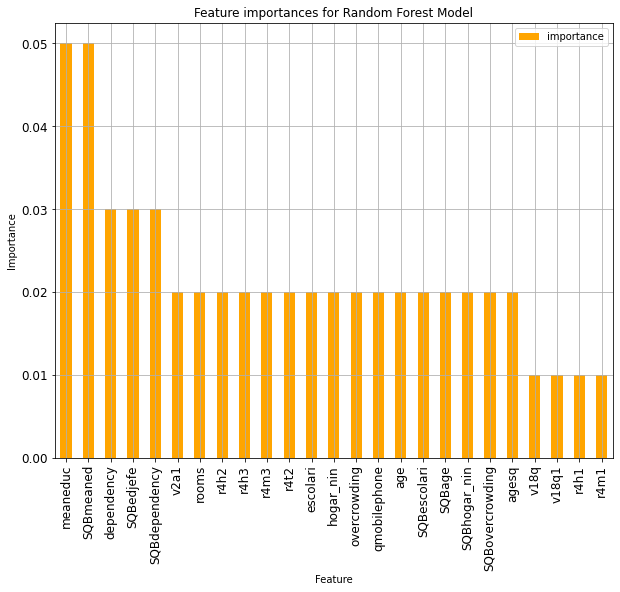

In [58]:
ax = df_feature_importance[:25].plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Random Forest Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

In [59]:
y_pred = clf.predict(X_test)

In [60]:
conf_mat = confusion_matrix(y_test, y_pred)

In [61]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

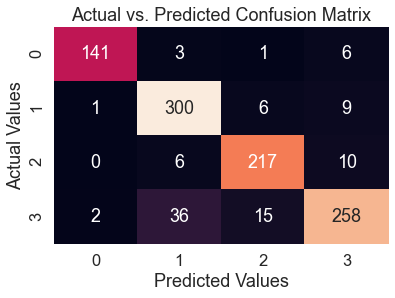

In [62]:
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [63]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [64]:
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)* 100)

model accuracy: 90.60336300692384


In [78]:
predictions_prob = clf.predict_proba(X_test)
print(predictions_prob)

# isolating prob of class == 1
predictions_prob = clf.predict_proba(X_test)[:, 1]
predictions_prob

[[0.04 0.9  0.04 0.02]
 [0.07 0.31 0.41 0.21]
 [0.06 0.73 0.12 0.09]
 ...
 [0.59 0.31 0.06 0.04]
 [0.18 0.66 0.15 0.01]
 [0.16 0.44 0.28 0.12]]


array([0.9 , 0.31, 0.73, ..., 0.31, 0.66, 0.44])

In [77]:
fpr2, tpr2, thresholds  = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 1)

In [67]:
print(fpr2)
print('\n')
print(tpr2)
print('\n')
print(thresholds)

[0.         0.00348837 0.00813953 0.01511628 0.0244186  0.02790698
 0.03488372 0.03953488 0.04767442 0.05465116 0.08255814 0.09883721
 0.10581395 0.11627907 0.13023256 0.13837209 0.14186047 0.14651163
 0.15465116 0.15930233 0.16627907 0.17093023 0.17790698 0.18953488
 0.19767442 0.20697674 0.21046512 0.21976744 0.2255814  0.23255814
 0.24302326 0.25116279 0.25465116 0.26162791 0.26744186 0.26976744
 0.27325581 0.27790698 0.28139535 0.28372093 0.2872093  0.29302326
 0.29767442 0.30116279 0.31511628 0.32209302 0.3255814  0.33023256
 0.3372093  0.33837209 0.34302326 0.35       0.35930233 0.36395349
 0.36511628 0.37325581 0.37906977 0.38255814 0.39069767 0.39534884
 0.40232558 0.41162791 0.41860465 0.4255814  0.42790698 0.43837209
 0.44186047 0.45       0.46046512 0.47209302 0.4755814  0.48488372
 0.49302326 0.49651163 0.50813953 0.52093023 0.53372093 0.56395349
 0.58604651 0.61162791 0.63372093 0.65697674 0.68604651 0.71511628
 0.73953488 0.76627907 0.79418605 0.81511628 0.85       0.8860

In [68]:
auc_rf = metrics.auc(fpr2, tpr2)
auc_rf

0.3112236254427846

AUC is very LOW!! But we have done this for a single class only. 

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.93      0.96       151
           2       0.87      0.95      0.91       316
           3       0.91      0.93      0.92       233
           4       0.91      0.83      0.87       311

    accuracy                           0.91      1011
   macro avg       0.92      0.91      0.91      1011
weighted avg       0.91      0.91      0.91      1011



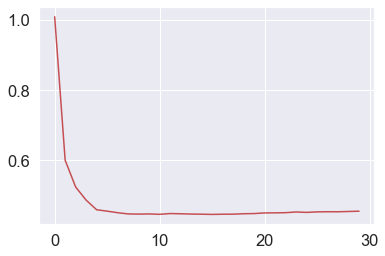

In [70]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, 
                                    n_jobs=-1,  
                                    warm_start=True, 
                                    random_state=1514)
for i in range(30):
    growing_rf.fit(X_train, y_train)
    
    growing_rf.n_estimators += 10
    
    errors.append(metrics.log_loss(y_test, growing_rf.predict_proba(X_test)))    # log_loss(y_true,y_pred)

_ = plt.plot(errors, '-r')

### Tunning: 

### Grid Search

In [79]:
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)

In [80]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [81]:
preds = gs.predict(X_test)

#### Classification Report :
- is the measure of quality of the classification algo. 
- **Precision** : percent of predictions that are correct
- **Recall** : fraction of positives that were correctly identified
- **F1 Score** : percent of positive predictions that were correct
- **Support** : number of actual occurrences of the class in the dataset
- **Macro Average** : averaging the unweighted mean per label
- **Weighted Average** : averaging the support-weighted mean per label 
- **Sample Average** : only for multilabel classification

In [82]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95       151
           2       0.88      0.93      0.90       316
           3       0.90      0.93      0.91       233
           4       0.91      0.84      0.87       311

    accuracy                           0.90      1011
   macro avg       0.91      0.91      0.91      1011
weighted avg       0.90      0.90      0.90      1011



Confusion Matrx : 

In [83]:
print(confusion_matrix(y_test,preds))

[[142   2   1   6]
 [  3 294   7  12]
 [  2   8 216   7]
 [  2  32  17 260]]


In [84]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'n_estimators': 51}
0.8619852158268978
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [85]:
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9234887056391233 {'n_estimators': 40}
0.9214787613470017 {'n_estimators': 41}
0.9241595365457652 {'n_estimators': 42}
0.9213427826941806 {'n_estimators': 43}
0.9245602130001189 {'n_estimators': 44}
0.9254932930547679 {'n_estimators': 45}
0.9238900041915488 {'n_estimators': 46}
0.9282982769963665 {'n_estimators': 47}
0.9241558947406237 {'n_estimators': 48}
0.9265634728890646 {'n_estimators': 49}
0.9256301494414132 {'n_estimators': 50}
0.928431589201325 {'n_estimators': 51}
0.9242927836381551 {'n_estimators': 52}
0.9256293230746832 {'n_estimators': 53}
0.9238909976983993 {'n_estimators': 54}
0.9274975065562329 {'n_estimators': 55}
0.9228190448490086 {'n_estimators': 56}
0.9238929847088956 {'n_estimators': 57}
0.9276322531754073 {'n_estimators': 58}
0.9258955402709939 {'n_estimators': 59}
0.9258958707227342 {'n_estimators': 60}
